# QF620 Project | Part 4  (Dynamic Hedging)

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pylab as plt
import pandas as pd

## Use a Black-Scholes model to simulate the stock price. 

In [2]:
def BlackScholesCall(S, K, r, sigma, T,t):
    d1 = (np.log(S/K)+(r+sigma**2/2)*(T-t)) / (sigma*np.sqrt(T-t))
    d2 = d1 - sigma*np.sqrt(T-t)
    return S*norm.cdf(d1) - K*np.exp(-r*(T-t))*norm.cdf(d2)

def simulate_Brownian_Motion(paths, N, deltaT):  #Wt
    X = np.c_[np.zeros((paths, 1)),
              np.random.randn(paths, N)]
    return np.cumsum(np.sqrt(deltaT) * X, axis=1)

def simulate_Stock(S0, K, r, sigma, t, paths, N, deltaT): 
    St = S0 * np.exp((r-sigma**2/2)*t+sigma*(simulate_Brownian_Motion(paths, N, deltaT)))
    return St     


### Suppose S0 = $100, \sigma= 0.2, r = 5%, T = 1/12 year, i.e. 1 month, and K = 100.
### Suppose we sell this at-the-money call option, and we hedge N times during the life of the
### call option. Assume there are 21 trading days over the month.

In [3]:
N = 21   #N=21 or 84
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 1/12
paths = 50_000

In [4]:
t = np.linspace(0, T, N+1)
deltaT = T/N
S = simulate_Stock(S0, K, r, sigma, t, paths, N, deltaT) #St

In [5]:
S

array([[100.        , 101.00876872, 102.08656173, ..., 105.40715643,
        105.48974275, 104.27962365],
       [100.        ,  98.12368006,  98.78533166, ...,  89.58168472,
         88.46188179,  89.06994391],
       [100.        ,  96.66408215,  96.21603578, ..., 105.2309068 ,
        107.43897566, 107.43752261],
       ...,
       [100.        , 100.11693665, 100.74189801, ...,  99.18465038,
        101.38699114, 100.62254673],
       [100.        ,  99.0543126 ,  98.87182354, ...,  93.90989726,
         97.09837726,  98.47438   ],
       [100.        , 101.52635875, 103.05268921, ..., 103.89852427,
        102.88945675, 102.6227327 ]])

In [6]:
d1 = (np.log(S/K)+(r+sigma**2/2)*(T-t)) / (sigma*np.sqrt(T-t))
d2 = d1 - sigma*np.sqrt(T-t)
phi=(norm.cdf(d1))[:,:-1]
psi= (-norm.cdf(d2))[:,:-1]
bt = K*np.exp(-r*(T-t))

<ipython-input-6-56678dafdd6f>:1: RuntimeWarning: divide by zero encountered in true_divide
  d1 = (np.log(S/K)+(r+sigma**2/2)*(T-t)) / (sigma*np.sqrt(T-t))


In [7]:
hedging_portfolio = S[:,1:]*phi+bt[1:]*psi 

In [8]:
hedging_portfolio

array([[ 3.04682185e+00,  3.67082918e+00,  3.37631337e+00, ...,
         5.44796745e+00,  5.51025093e+00,  4.27963887e+00],
       [ 1.48818393e+00,  1.82089255e+00,  1.42174586e+00, ...,
        -5.20693204e-05, -3.59158677e-10,  9.71004412e-23],
       [ 6.99651956e-01,  8.96797154e-01,  1.00338509e+00, ...,
         4.53248922e+00,  7.45568583e+00,  7.43752261e+00],
       ...,
       [ 2.56501923e+00,  2.84194472e+00,  2.55071061e+00, ...,
         4.61107690e-01,  1.11606462e+00,  8.11886892e-01],
       [ 1.99094808e+00,  1.87330300e+00,  1.74090983e+00, ...,
         1.18795063e-03,  8.49507639e-04,  1.82476533e-02],
       [ 3.32644426e+00,  4.31989040e+00,  2.97337042e+00, ...,
         3.96247700e+00,  2.93414575e+00,  2.63096271e+00]])

In [9]:
Calloption = BlackScholesCall(S, K, r, sigma, T,t)

<ipython-input-2-201d59f48c00>:2: RuntimeWarning: divide by zero encountered in true_divide
  d1 = (np.log(S/K)+(r+sigma**2/2)*(T-t)) / (sigma*np.sqrt(T-t))


In [10]:
Calloption

array([[2.51206709e+00, 3.02604729e+00, 3.65558992e+00, ...,
        5.44758678e+00, 5.50958491e+00, 4.27962365e+00],
       [2.51206709e+00, 1.55979033e+00, 1.77964773e+00, ...,
        9.95665823e-11, 1.55191260e-23, 0.00000000e+00],
       [2.51206709e+00, 1.04016195e+00, 8.57946200e-01, ...,
        5.27162760e+00, 7.45881496e+00, 7.43752261e+00],
       ...,
       [2.51206709e+00, 2.51015815e+00, 2.79884472e+00, ...,
        3.86514738e-01, 1.49232047e+00, 6.22546728e-01],
       [2.51206709e+00, 1.96834103e+00, 1.81881565e+00, ...,
        9.92385246e-05, 4.26804031e-03, 0.00000000e+00],
       [2.51206709e+00, 3.35020576e+00, 4.34285183e+00, ...,
        3.94789376e+00, 2.91430451e+00, 2.62273270e+00]])

In [11]:
portfolio = (hedging_portfolio - Calloption[:,1:])  #error1~20

In [12]:
portfolio

array([[ 2.07745655e-02,  1.52392633e-02,  4.93431364e-02, ...,
         3.80679193e-04,  6.66024578e-04,  1.52218269e-05],
       [-7.16064043e-02,  4.12448254e-02,  3.20707891e-02, ...,
        -5.20694200e-05, -3.59158677e-10,  9.71004412e-23],
       [-3.40509996e-01,  3.88509545e-02,  4.04604400e-02, ...,
        -7.39138378e-01, -3.12912566e-03,  1.33900357e-09],
       ...,
       [ 5.48610732e-02,  4.30999987e-02,  5.16723140e-02, ...,
         7.45929522e-02, -3.76255850e-01,  1.89340164e-01],
       [ 2.26070551e-02,  5.44873464e-02,  5.60093508e-02, ...,
         1.08871211e-03, -3.41853267e-03,  1.82476533e-02],
       [-2.37615027e-02, -2.29614320e-02, -4.89195120e-02, ...,
         1.45832417e-02,  1.98412416e-02,  8.23000726e-03]])

### Define Hedging Error

In [13]:
Hedging_Error=np.sum(portfolio,axis=1)+Calloption[:,-1]-np.maximum(S[:,-1]-K,0)   #error1~20 + error21

In [14]:
print(np.mean(Hedging_Error))
print(np.std(Hedging_Error))

-0.00022477982294662413
0.4268732534734078


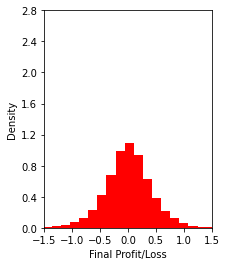

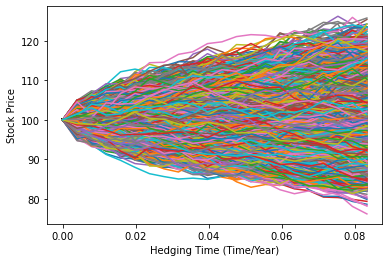

In [15]:
plt.figure(figsize = (3,4))
plt.xlabel('Final Profit/Loss')
plt.ylabel('Density')
plt.yticks(np.linspace(0,2.8,8))
plt.xticks(np.linspace(-1.5,1.5,7))
plt.hist(Hedging_Error, bins=31, density=True, color='r')
plt.ylim((0,2.8))
plt.xlim((-1.5,1.5))
plt.savefig('img1.png')
plt.figure()
x = simulate_Brownian_Motion(paths, N , T)
plt.plot(t, S.T)
plt.xlabel('Hedging Time (Time/Year)')
plt.ylabel('Stock Price')
plt.savefig('img2.png')
plt.show()


## For N=84

In [16]:
N = 84   #N=21 or 84
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 1/12
paths = 50_000

In [17]:
t = np.linspace(0, T, N+1)
deltaT = T/N
S = simulate_Stock(S0, K, r, sigma, t, paths, N, deltaT) #St

In [18]:
d1 = (np.log(S/K)+(r+sigma**2/2)*(T-t)) / (sigma*np.sqrt(T-t))
d2 = d1 - sigma*np.sqrt(T-t)
phi=(norm.cdf(d1))[:,:-1]
psi= (-norm.cdf(d2))[:,:-1]
bt = K*np.exp(-r*(T-t))

<ipython-input-18-56678dafdd6f>:1: RuntimeWarning: divide by zero encountered in true_divide
  d1 = (np.log(S/K)+(r+sigma**2/2)*(T-t)) / (sigma*np.sqrt(T-t))


In [19]:
hedging_portfolio = S[:,1:]*phi+bt[1:]*psi 

In [20]:
Calloption = BlackScholesCall(S, K, r, sigma, T,t)

<ipython-input-2-201d59f48c00>:2: RuntimeWarning: divide by zero encountered in true_divide
  d1 = (np.log(S/K)+(r+sigma**2/2)*(T-t)) / (sigma*np.sqrt(T-t))


In [21]:
Calloption

array([[2.51206709e+00, 2.53298832e+00, 2.85000083e+00, ...,
        9.12806274e+00, 8.57852735e+00, 8.66736160e+00],
       [2.51206709e+00, 3.09995240e+00, 2.84389025e+00, ...,
        1.63953340e-33, 5.58989806e-66, 0.00000000e+00],
       [2.51206709e+00, 2.29433957e+00, 2.20946166e+00, ...,
        1.28416145e+01, 1.29489943e+01, 1.40879590e+01],
       ...,
       [2.51206709e+00, 2.45999109e+00, 2.10116540e+00, ...,
        3.39091921e+00, 4.85492771e+00, 4.48844998e+00],
       [2.51206709e+00, 2.02028182e+00, 2.18081916e+00, ...,
        1.56034991e-01, 5.71854384e-01, 9.86032711e-01],
       [2.51206709e+00, 2.28168812e+00, 2.51856153e+00, ...,
        3.88300691e-11, 7.10031554e-16, 0.00000000e+00]])

In [22]:
portfolio = (hedging_portfolio - Calloption[:,1:])  #error1~20

In [23]:
Hedging_Error=np.sum(portfolio,axis=1)+Calloption[:,-1]-np.maximum(S[:,-1]-K,0)   #error1~20 + error21

In [24]:
print(np.mean(Hedging_Error))
print(np.std(Hedging_Error))

-0.0006697149689749716
0.21841555011670774


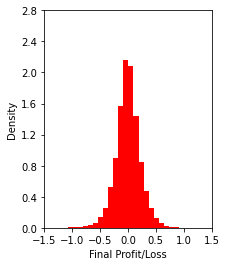

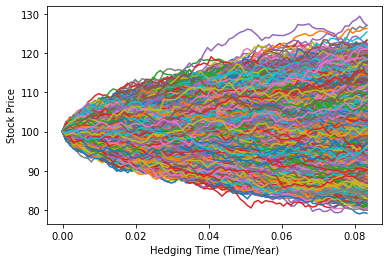

In [25]:
plt.figure(figsize = (3,4))
plt.xlabel('Final Profit/Loss')
plt.ylabel('Density')
plt.yticks(np.linspace(0,2.8,8))
plt.xticks(np.linspace(-1.5,1.5,7))
plt.hist(Hedging_Error, bins=31, density=True, color='r')
plt.ylim((0,2.8))
plt.xlim((-1.5,1.5))
plt.savefig('img3.png')
plt.figure()
x = simulate_Brownian_Motion(paths, N , T)
plt.plot(t, S.T)
plt.xlabel('Hedging Time (Time/Year)')
plt.ylabel('Stock Price')
plt.savefig('img4.png')
plt.show()
